In [1]:
import torch
from torch import from_numpy
import numpy as np
import lpips
from itertools import combinations
from tqdm import tqdm
from config import load_config
from utils import get_data_tensor, extract_features_statistics, LeNet, compute_fid

In [2]:
config = load_config()

linear_beta_imgs = from_numpy(
    np.load("results/mnist_50000_iter_linear_beta_schedule_20_steps_samples.npz")["x"]
)

cosine_imgs = from_numpy(
    np.load("results/mnist_50000_iter_cosine_schedule_20_steps_samples.npz")["x"]
)

flat_temp_imgs = from_numpy(
    np.load("results/mnist_50000_iter_flattening_temp_unbiased_schedule_20_ode_steps_samples.npz")["x"]
)

train_imgs = get_data_tensor(config)
test_imgs = get_data_tensor(config, train=False)

imgs_dict = {
    "linear_beta": linear_beta_imgs,
    "cosine": cosine_imgs,
    "flat_temp": flat_temp_imgs,
    "train": train_imgs
}

device = "cuda"

# FID

In [3]:
lenet = LeNet(1024, 10).to(device)
lenet.load_state_dict(torch.load(f"checkpoints/lenet_{config.data.dataset_name}.pth"))

mu_test, sigma_test = extract_features_statistics(test_imgs, lenet)

/home/coder/tmp/ipykernel_681149/4262370379.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lenet.load_state_dict(torch.load(f"checkpoints/lenet_{config.data.dataset_nam

In [4]:
for name, imgs in imgs_dict.items():
    mu, sigma = extract_features_statistics(imgs, lenet)
    fid = compute_fid(mu, sigma, mu_test, sigma_test)
    print(f"{name} FID: {fid}")

linear_beta FID: (0.8768349, 2.7016855663155175, 3.578520495304928)
cosine FID: (0.53193235, 1.8221521894783743, 2.354084543451763)
flat_temp FID: (0.35320657, 1.4962270193272877, 1.8494335942441273)
train FID: (0.09208611, 0.8146739418550264, 0.906760048393799)


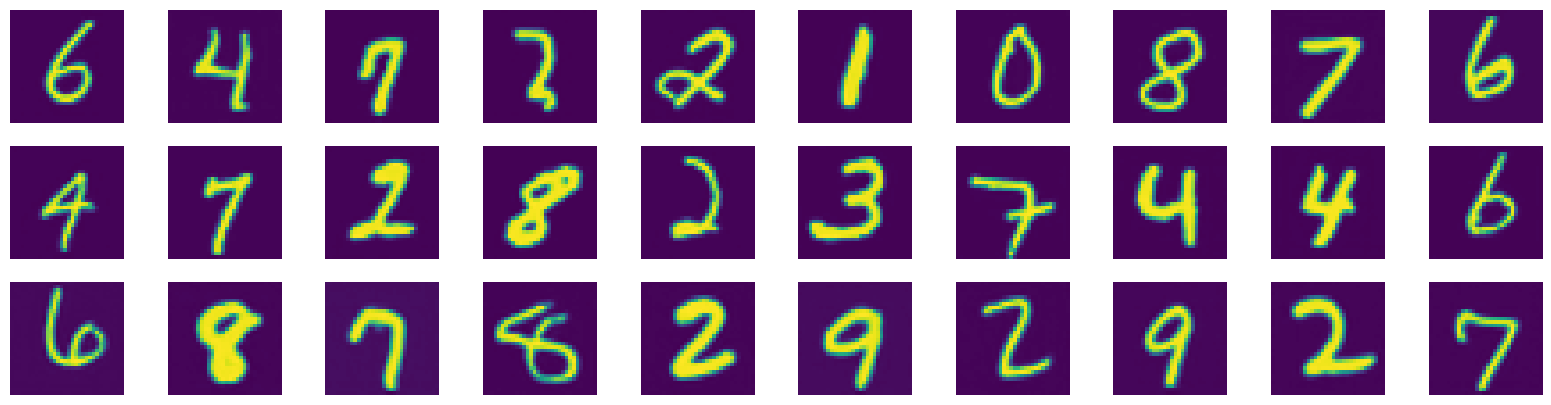

In [10]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 5))

for i in range(10):
    plt.subplot(3, 10, i + 1)
    plt.imshow(linear_beta_imgs[i, 0])
    plt.axis("off")
    plt.subplot(3, 10, i + 11)
    plt.imshow(cosine_imgs[i, 0])
    plt.axis("off")
    plt.subplot(3, 10, i + 21)
    plt.imshow(flat_temp_imgs[i, 0])
    plt.axis("off")

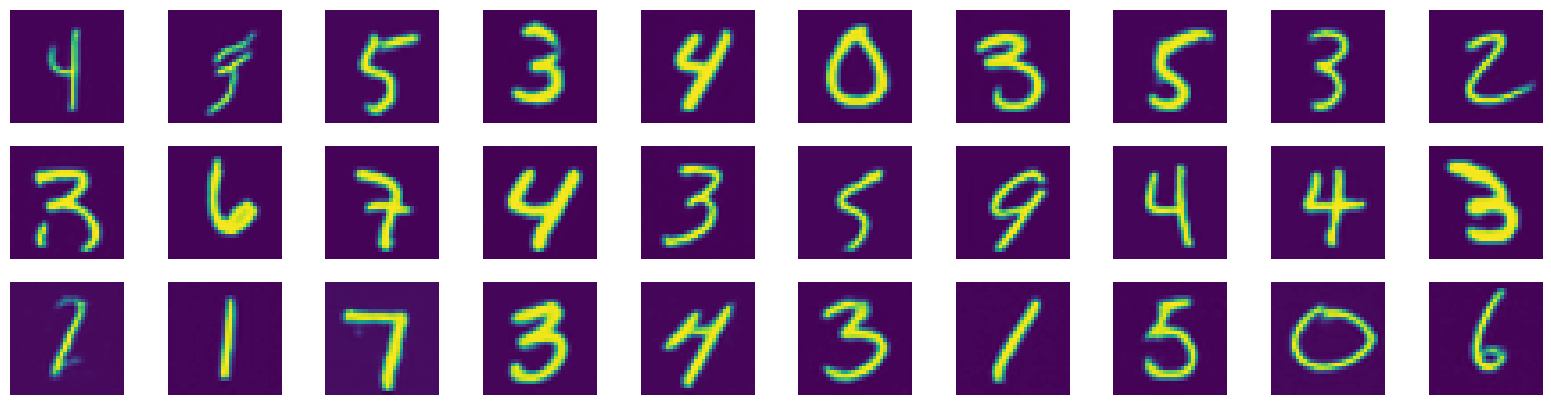

In [12]:
x1 = from_numpy(
    np.load("results/mnist_50000_iter_linear_beta_schedule_10_steps_samples.npz")["x"]
)

x2 = from_numpy(
    np.load("results/mnist_50000_iter_cosine_schedule_10_steps_samples.npz")["x"]
)


x3 = from_numpy(
    np.load("results/mnist_50000_iter_flattening_temp_unbiased_schedule_10_steps_samples.npz")["x"]
)

plt.figure(figsize=(20, 5))

for i in range(10):
    plt.subplot(3, 10, i + 1)
    plt.imshow(x1[10 + i, 0])
    plt.axis("off")
    plt.subplot(3, 10, i + 11)
    plt.imshow(x2[10 + i, 0])
    plt.axis("off")
    plt.subplot(3, 10, i + 21)
    plt.imshow(x3[10 + i, 0])
    plt.axis("off")

In [16]:
from torch.utils.data import DataLoader


preds1 = []
for batch in DataLoader(x1, batch_size=500):
    preds1.append(lenet(batch.cuda()))

preds2 = []
for batch in DataLoader(x2, batch_size=500):
    preds2.append(lenet(batch.cuda()))

preds3 = []
for batch in DataLoader(x3, batch_size=500):
    preds3.append(lenet(batch.cuda()))

(array([0.09464815, 0.12455556, 0.09837037, 0.11833333, 0.11012963,
        0.09655556, 0.10892593, 0.1107963 , 0.11742593, 0.13137037]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

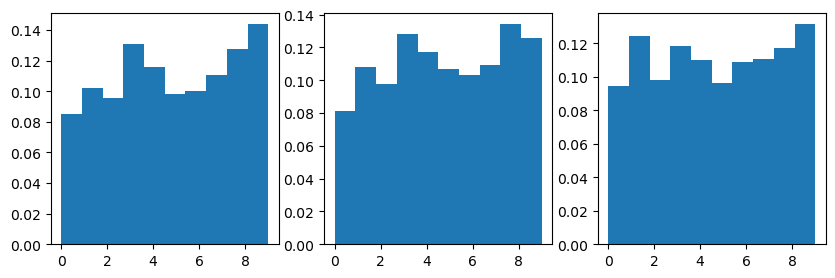

In [31]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 3, 1)
plt.hist(torch.cat(preds1, dim=0).detach().cpu().argmax(dim=1), bins=10, density=True)

plt.subplot(1, 3, 2)
plt.hist(torch.cat(preds2, dim=0).detach().cpu().argmax(dim=1), bins=10, density=True)

plt.subplot(1, 3, 3)
plt.hist(torch.cat(preds3, dim=0).detach().cpu().argmax(dim=1), bins=10, density=True)

plt.tight_layout()
plt.show()

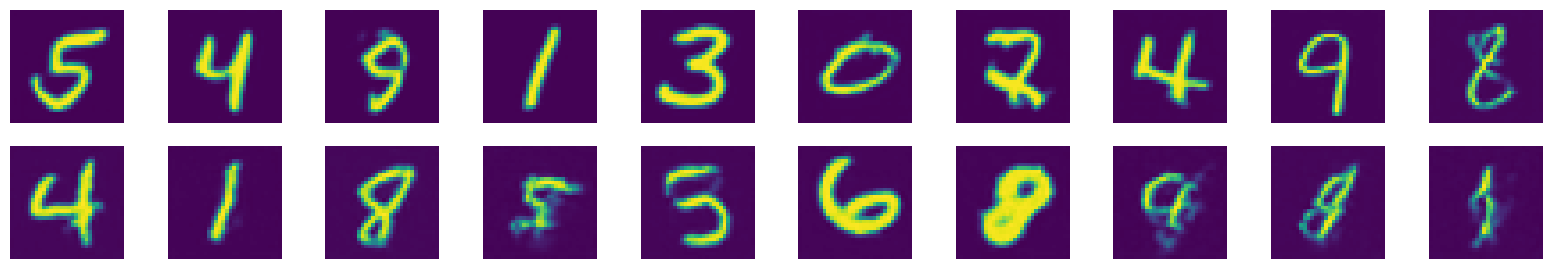

In [33]:
# x1 = from_numpy(
#     np.load("results/mnist_50000_iter_linear_beta_schedule_5_steps_ode_samples.npz")["x"]
# )

x2 = from_numpy(
    np.load("results/mnist_50000_iter_cosine_schedule_5_ode_steps_samples.npz")["x"]
)


x3 = from_numpy(
    np.load("results/mnist_50000_iter_flattening_temp_unbiased_schedule_5_ode_steps_samples.npz")["x"]
)

plt.figure(figsize=(20, 5))

for i in range(10):
    # plt.subplot(3, 10, i + 1)
    # plt.imshow(x1[10 + i, 0])
    # plt.axis("off")
    plt.subplot(3, 10, i + 11)
    plt.imshow(x2[10 + i, 0])
    plt.axis("off")
    plt.subplot(3, 10, i + 21)
    plt.imshow(x3[10 + i, 0])
    plt.axis("off")

In [34]:
from torch.utils.data import DataLoader


# preds1 = []
# for batch in DataLoader(x1, batch_size=500):
#     preds1.append(lenet(batch.cuda()))

preds2 = []
for batch in DataLoader(x2, batch_size=500):
    preds2.append(lenet(batch.cuda()))

preds3 = []
for batch in DataLoader(x3, batch_size=500):
    preds3.append(lenet(batch.cuda()))

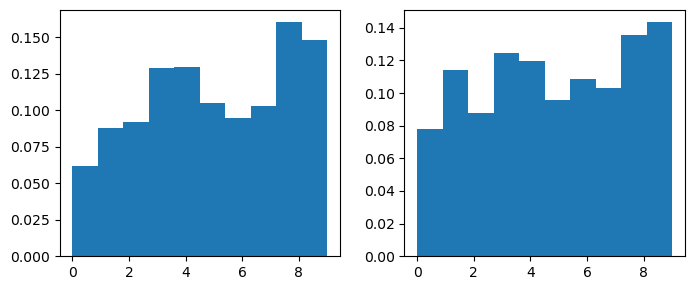

In [35]:
plt.figure(figsize=(10, 3))

# plt.subplot(1, 3, 1)
# plt.hist(torch.cat(preds1, dim=0).detach().cpu().argmax(dim=1), bins=10, density=True)

plt.subplot(1, 3, 2)
plt.hist(torch.cat(preds2, dim=0).detach().cpu().argmax(dim=1), bins=10, density=True)

plt.subplot(1, 3, 3)
plt.hist(torch.cat(preds3, dim=0).detach().cpu().argmax(dim=1), bins=10, density=True)

plt.tight_layout()
plt.show()

# LPIPS


In [5]:
lpips_model = lpips.LPIPS(net='vgg').cuda()


def compute_pairwise_lpips(imgs):
    pairwise_scores = []

    n = len(imgs)
    for i, j in tqdm(combinations(range(n), 2), total=n * (n - 1) // 2):
        with torch.no_grad():
            pairwise_scores.append(lpips_model(imgs[i], imgs[j]).item())

    return pairwise_scores

Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]


/home/coder/.local/lib/python310-conda-cuda-torch21/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/coder/.local/lib/python310-conda-cuda-torch21/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /home/coder/.local/lib/python310-conda-cuda-torch21/site-packages/lpips/weights/v0.1/vgg.pth


/home/coder/.local/lib/python310-conda-cuda-torch21/site-packages/lpips/lpips.py:107: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(model_pat

In [6]:
for name, imgs in imgs_dict.items():
    lpips_score = np.mean(compute_pairwise_lpips(imgs[:100].cuda())),
    print(f"{name} LPIPS: {lpips_score}")

100%|██████████| 4950/4950 [00:17<00:00, 275.85it/s]


linear_beta FID: (0.29988983509666994,)


100%|██████████| 4950/4950 [00:18<00:00, 272.97it/s]


cosine FID: (0.30320586352938356,)


100%|██████████| 4950/4950 [00:18<00:00, 268.46it/s]


flat_temp FID: (0.31516054488944284,)


100%|██████████| 4950/4950 [00:18<00:00, 271.37it/s]

train FID: (0.31995293774143463,)


# Likelihood

In [19]:
linear_beta_ll = from_numpy(
    np.load("results/mnist_50000_iter_linear_beta_schedule_20_ode_steps_samples.npz")["ll"]
)

cosine_ll = from_numpy(
    np.load("results/mnist_50000_iter_cosine_schedule_20_ode_steps_samples.npz")["ll"]
)


flat_temp_ll = from_numpy(
    np.load("results/mnist_50000_iter_flattening_temp_unbiased_schedule_20_ode_steps_samples.npz")["ll"]
)

In [21]:
for name, ll in zip(imgs_dict, [linear_beta_ll, cosine_ll, flat_temp_ll]):
    print(f"{name} average log-likelihood: {ll[:, 0].mean()}")

linear_beta average log-likelihood: 990.072509765625
cosine average log-likelihood: 1711.6171875
flat_temp average log-likelihood: 61.293853759765625


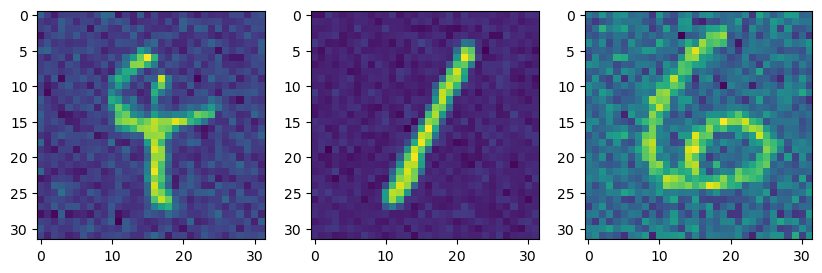

In [23]:
import matplotlib.pyplot as plt

x1 = from_numpy(
    np.load("results/mnist_50000_iter_linear_beta_schedule_20_ode_steps_samples.npz")["x"]
)

x2 = from_numpy(
    np.load("results/mnist_50000_iter_cosine_schedule_20_ode_steps_samples.npz")["x"]
)

x3 = flat_temp_ll = from_numpy(
    np.load("results/mnist_50000_iter_flattening_temp_unbiased_schedule_20_ode_steps_samples.npz")["x"]
)

plt.figure(figsize=(10, 3))

plt.subplot(1, 3, 1)
plt.imshow(x1[0, 0])
plt.subplot(1, 3, 2)
plt.imshow(x2[0, 0])
plt.subplot(1, 3, 3)
plt.imshow(x3[0, 0])